In [47]:
import math

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle


def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

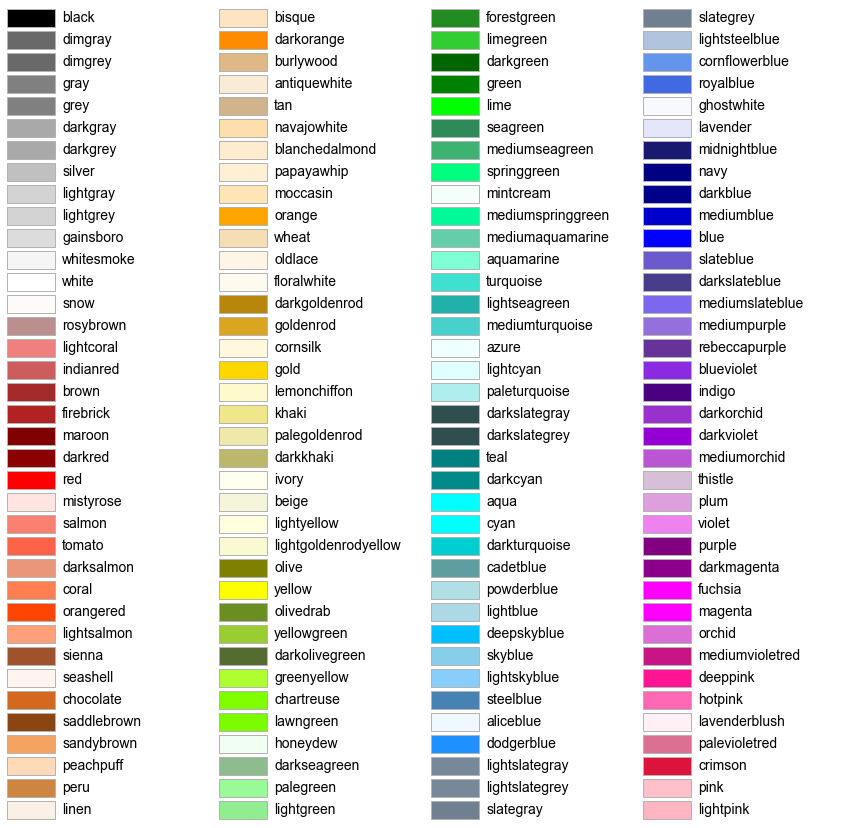

In [48]:
plot_colortable(mcolors.CSS4_COLORS)
plt.show()

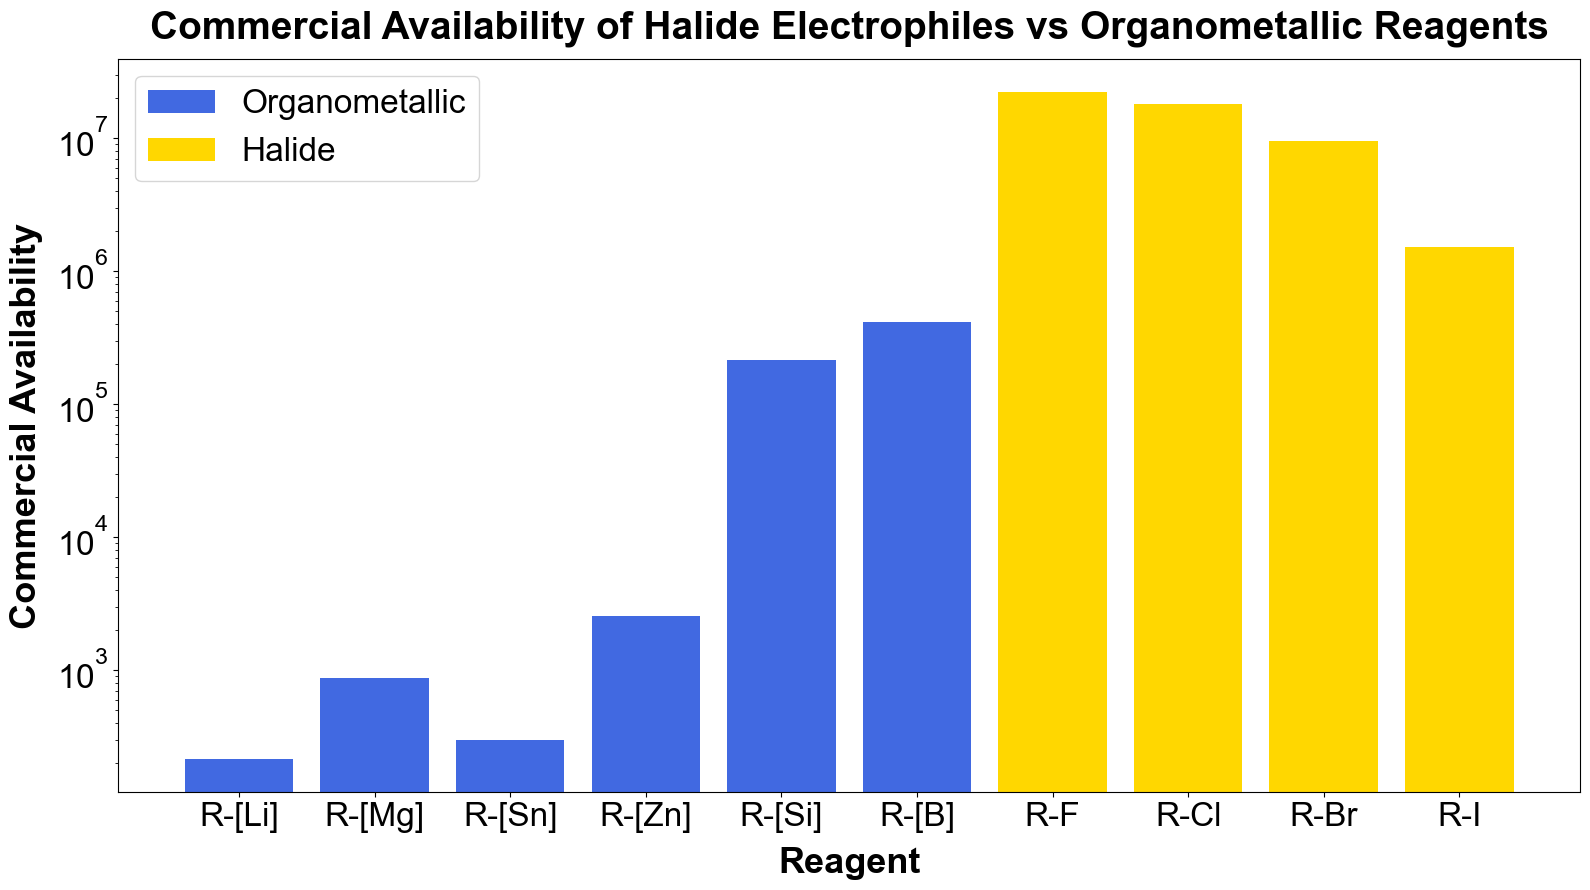

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Data provided by the user
data = {
    "Reagent": ["R-[Li]", "R-[Mg]", "R-[Sn]", "R-[Zn]", "R-[Si]", "R-[B]", "R-F", "R-Cl", "R-Br", "R-I"],
    "Availability": [214, 873, 296, 2555, 213358, 412556, 22185779, 18159244, 9626118, 1526327],
    "Type": ["Organometallic", "Organometallic", "Organometallic", "Organometallic", "Organometallic", "Organometallic", "Halide", "Halide", "Halide", "Halide"]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Define font sizes relative to the title font size
title_font_size = 28
axis_label_font_size = title_font_size - 2
tick_label_font_size = title_font_size - 4
legend_font_size = title_font_size - 4

# Plotting the graph
plt.figure(figsize=(16, 9))

# Plotting each reagent type in a different color
for reagent_type in df['Type'].unique():
    subset = df[df['Type'] == reagent_type]
    if reagent_type == 'Organometallic':
        plt.bar(subset['Reagent'], subset['Availability'], label=reagent_type, color=mcolors.CSS4_COLORS['royalblue'])
    else:
        plt.bar(subset['Reagent'], subset['Availability'], label=reagent_type, color=mcolors.CSS4_COLORS['gold'])

# Setting the labels with increased font size based on the title
plt.xlabel('Reagent', fontsize=axis_label_font_size, labelpad=10, weight='bold')
plt.ylabel('Commercial Availability', fontsize=axis_label_font_size, labelpad=10, weight='bold')
# Setting the title with specified properties
plt.title('Commercial Availability of Halide Electrophiles vs Organometallic Reagents', 
          fontsize=title_font_size, weight='bold', position=(0.5, 3), pad=15)
# Setting the legend with increased font size based on the title
plt.legend(fontsize=legend_font_size)
# Setting the tick labels with increased font size based on the title
plt.xticks(fontsize=tick_label_font_size)
plt.yticks(fontsize=tick_label_font_size)
# Use a logarithmic scale for the y-axis due to large range of values
plt.yscale('log')
plt.tight_layout()
# Setting the legend with increased font size based on the title
plt.legend(fontsize=legend_font_size)

# set font to aerial
plt.rcParams["font.family"] = "Arial"

fig.subplots_adjust(left=0, right=1, bottom=0.15, top=0.9)

# Save the figure to a file, high DPI for publication
plt.savefig('commercial_availability.png', dpi=600)
plt.show()

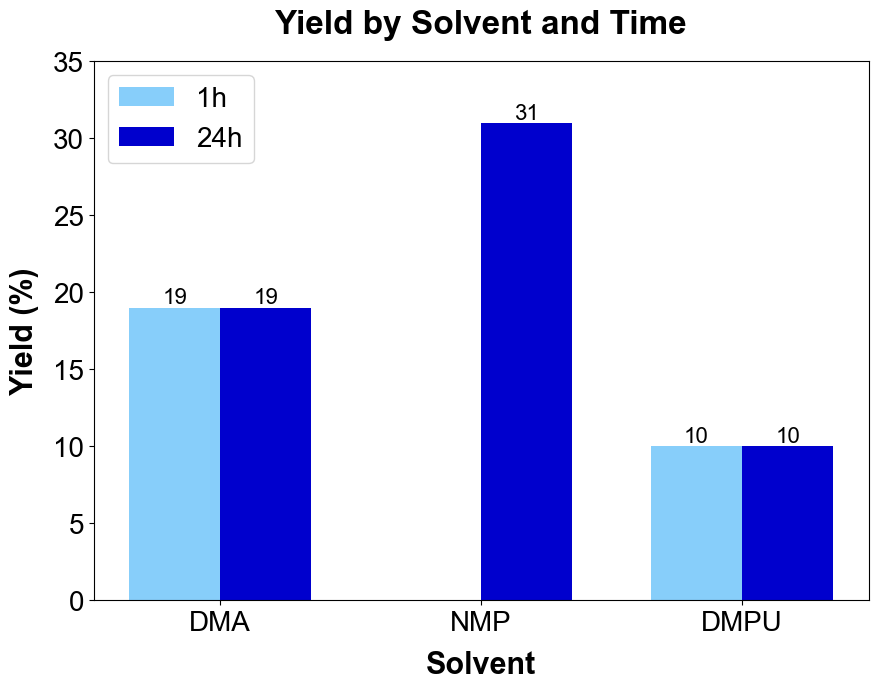

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Data from the image provided by the user
solvent_data = {
    "Solvent": ["DMA", "NMP", "DMPU"],
    "1h": [19, None, 10],  # None for NA values
    "24h": [19, 31, 10]
}

# Creating a DataFrame from the data
df_solvents = pd.DataFrame(solvent_data)

# Define font sizes relative to the title font size
title_font_size = 24
axis_label_font_size = title_font_size - 2
tick_label_font_size = title_font_size - 4
legend_font_size = title_font_size - 4

# Plotting the bar graph
plt.figure(figsize=(10, 7))

# Setting colors
colors = ['lightskyblue', 'mediumblue']
bar_width = 0.35
n = len(df_solvents['Solvent'])

# Plotting the bar graph with the adjusted figure size
for i, time_point in enumerate(["1h", "24h"]):
    bar_positions = np.arange(n) + i * bar_width
    bars = plt.bar(bar_positions, df_solvents[time_point], bar_width, label=time_point, color=colors[i])

    # Adding data labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        if pd.notnull(yval):  # Check for NaN values before adding label
            plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval) if pd.notnull(yval) else '',
                     ha='center', va='bottom', fontsize=tick_label_font_size - 4)

# Setting the labels with increased font size based on the title
plt.xlabel('Solvent', fontsize=axis_label_font_size, labelpad=10, weight='bold')
plt.ylabel('Yield (%)', fontsize=axis_label_font_size, labelpad=10, weight='bold')

# Setting the title with specified properties
plt.title('Yield by Solvent and Time', fontsize=title_font_size, weight='bold', pad=20)

# Setting the legend with increased font size based on the title
plt.legend(fontsize=legend_font_size)

# Setting the tick labels with increased font size based on the title
plt.xticks(np.arange(n) + bar_width / 2, df_solvents['Solvent'], rotation=0, fontsize=tick_label_font_size)
plt.yticks(fontsize=tick_label_font_size)

plt.ylim(0, 35)

# set legend marker to the left
plt.legend(fontsize=legend_font_size, loc='upper left')

# Set font to Arial
plt.rcParams["font.family"] = "Arial"


# Save the figure to a file, high DPI for publication quality
plt.savefig('solvent screening.png', dpi=600)
plt.show()

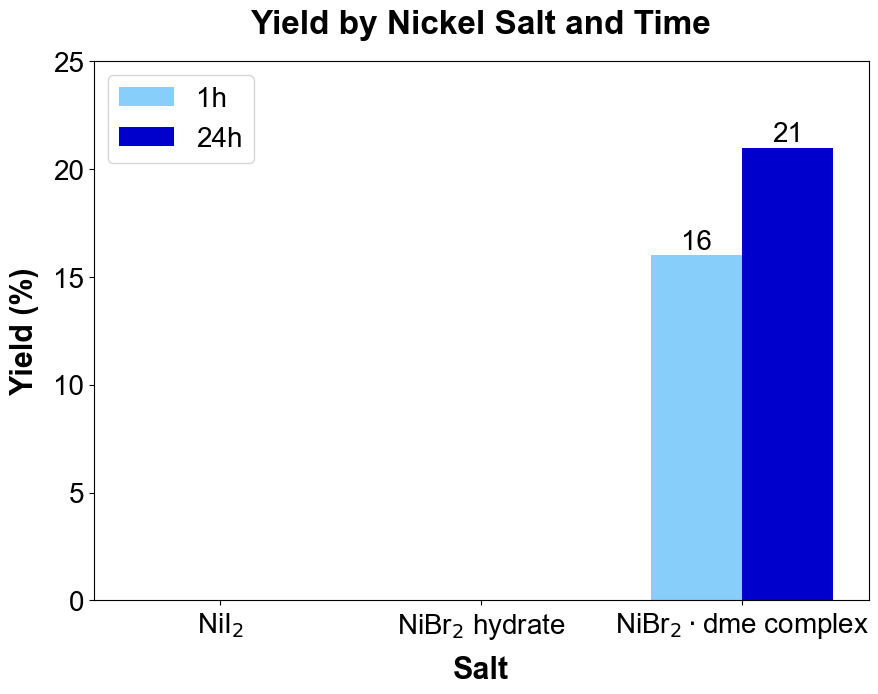

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Data from the image provided by the user
nickel_salts_data = {
    "Salt": ["NiI$_2$", "NiBr$_2$ hydrate", "NiBr$_2\cdot$dme complex"],
    "1h": [0, 0, 16],
    "24h": [0, 0, 21]
}

# Creating a DataFrame from the data
df_nickel_salts = pd.DataFrame(nickel_salts_data)

# Define font sizes relative to the title font size
title_font_size = 24
axis_label_font_size = title_font_size - 2
tick_label_font_size = title_font_size - 4
legend_font_size = title_font_size - 4

# Plotting the bar graph
plt.figure(figsize=(10, 7))

# Setting colors
colors = ['lightskyblue', 'mediumblue']
bar_width = 0.35
n = len(df_nickel_salts['Salt'])

# Plotting each salt at different time points
for i, time_point in enumerate(["1h", "24h"]):
    bar_positions = np.arange(n) + i * bar_width
    bars = plt.bar(bar_positions, df_nickel_salts[time_point], bar_width, label=time_point, color=colors[i])

    # Adding data labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval) if yval != 0 else '',
                 ha='center', va='bottom', fontsize=tick_label_font_size)

# Setting the labels with increased font size based on the title
plt.xlabel('Salt', fontsize=axis_label_font_size, labelpad=10, weight='bold')
plt.ylabel('Yield (%)', fontsize=axis_label_font_size, labelpad=10, weight='bold')

# Setting the title with specified properties
plt.title('Yield by Nickel Salt and Time', fontsize=title_font_size, weight='bold', pad=20)

# Setting the legend with increased font size based on the title
plt.legend(fontsize=legend_font_size)

# Setting the tick labels with increased font size based on the title
plt.xticks(np.arange(n) + bar_width / 2, df_nickel_salts['Salt'], rotation=0, fontsize=tick_label_font_size)
plt.yticks(fontsize=tick_label_font_size)

# Set font to Arial
plt.rcParams["font.family"] = "Arial"

plt.ylim(0, 25)


# Save the figure to a file, high DPI for publication quality
plt.savefig('metal salt screening.png', dpi=600)
plt.show()

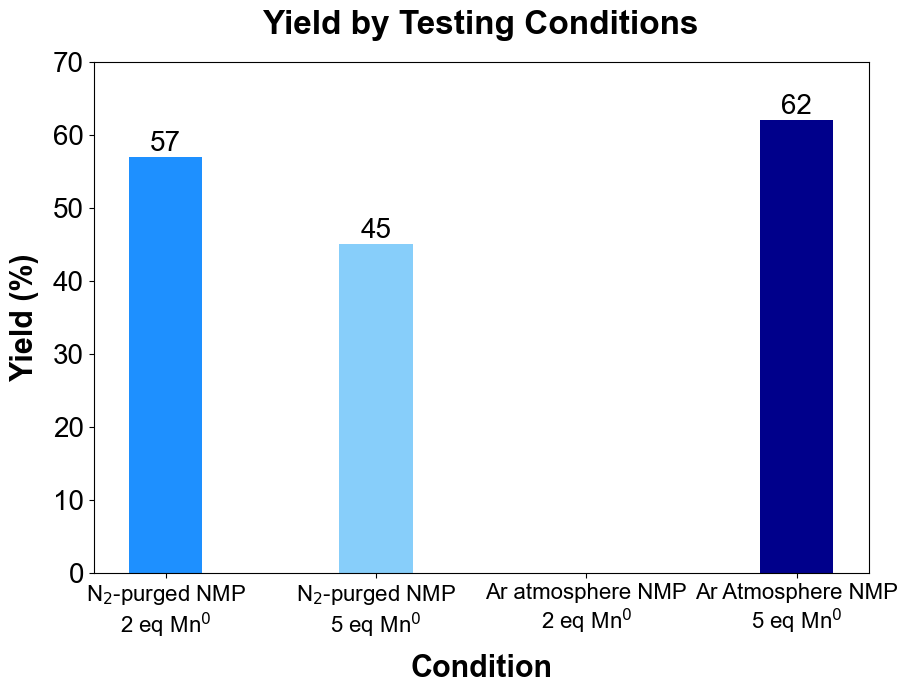

In [71]:
conditions_data = {
    "Condition": ["N$_2$-purged NMP\n2 eq Mn$^{0}$", "N$_2$-purged NMP\n5 eq Mn$^{0}$", "Ar atmosphere NMP\n2 eq Mn$^{0}$", "Ar Atmosphere NMP\n5 eq Mn$^{0}$"],
    "1h": [57, 45, 0, 62]
}

# Creating a DataFrame from the data
df_conditions = pd.DataFrame(conditions_data)

# Define font sizes relative to the title font size
title_font_size = 24
axis_label_font_size = title_font_size - 2
tick_label_font_size = title_font_size - 4
legend_font_size = title_font_size - 4

# Plotting the bar graph
plt.figure(figsize=(10, 7))

# Setting colors
colors = ['dodgerblue', 'lightskyblue', 'mediumblue', 'darkblue']
bar_width = 0.35
n = len(df_conditions['Condition'])

bar_positions = np.arange(n)
bars = plt.bar(bar_positions, df_conditions['1h'], bar_width, color=colors)

# Adding data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval) if yval != 0 else '',
             ha='center', va='bottom', fontsize=tick_label_font_size)

# Setting the labels with increased font size based on the title
plt.xlabel('Condition', fontsize=axis_label_font_size, labelpad=10, weight='bold')
plt.ylabel('Yield (%)', fontsize=axis_label_font_size, labelpad=10, weight='bold')

# Setting the title with specified properties
plt.title('Yield by Testing Conditions', fontsize=title_font_size, weight='bold', pad=20)

# Setting the tick labels with increased font size based on the title
plt.xticks(bar_positions, df_conditions['Condition'], rotation=0, fontsize=tick_label_font_size - 4)
plt.yticks(fontsize=tick_label_font_size)

# Set font to Arial
plt.rcParams["font.family"] = "Arial"

# Set y-axis limit to accommodate the highest data point with some space
plt.ylim(0, 70)

# adjust the figure margins
plt.subplots_adjust(bottom=0.15)

# Save the figure to a file, high DPI for publication quality
plt.savefig('Atmosphere screening.png', dpi=600)
plt.show()

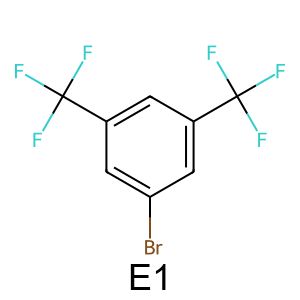

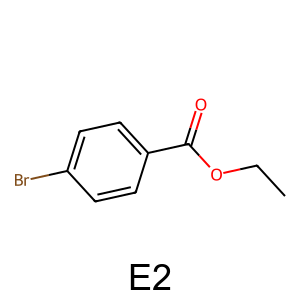

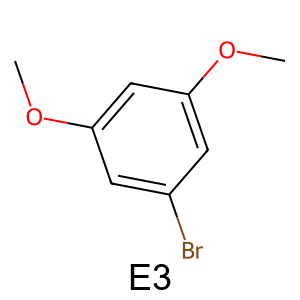

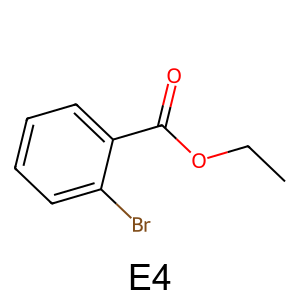

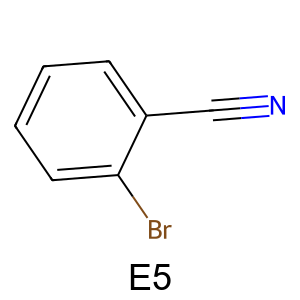

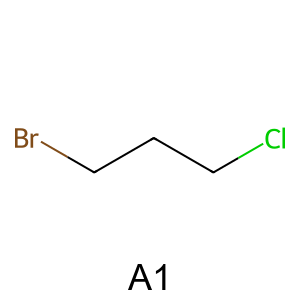

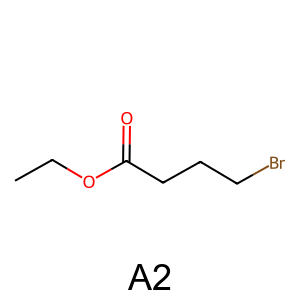

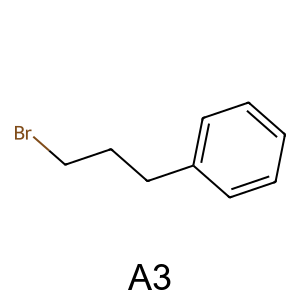

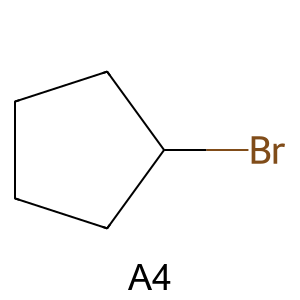

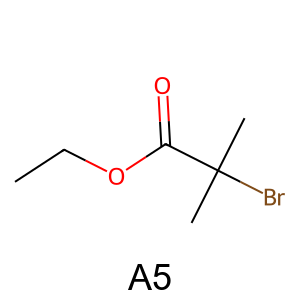

In [53]:
from rdkit import Chem
from rdkit.Chem import Draw
from PIL import Image, ImageDraw, ImageFont

# Covert SMILES code to images

SMILES_code = {
    'E1': 'BrC1=CC(C(F)(F)F)=CC(C(F)(F)F)=C1',
    'E2': 'BrC1=CC=C(C(OCC)=O)C=C1',
    'E3': 'BrC1=CC(OC)=CC(OC)=C1',
    'E4': 'BrC1=CC=CC=C1C(OCC)=O',
    'E5': 'BrC1=CC=CC=C1C#N',
    'A1': 'BrCCCCl',
    'A2': 'BrCCCC(OCC)=O',
    'A3': 'BrCCCC1=CC=CC=C1',
    'A4': 'BrC1CCCC1',
    'A5': 'CC(Br)(C(OCC)=O)C'
}

# Create a molecule object from SMILES code
for label, smiles in SMILES_code.items():
    molecule = Chem.MolFromSmiles(smiles, sanitize=True)
    # Add a label to the molecule
    molecule.SetProp(label, label)
    # Generate an image of the molecul, black background
    image = Draw.MolToImage(molecule, canvas = None)
    # Create a draw object
    draw = ImageDraw.Draw(image)
    # Define the font size
    font = ImageFont.truetype('arial.ttf', size = 36)
    # Draw the on the bottom center of the image, bold font, font size 24
    draw.text(xy = (image.width / 2, image.height - 10), text = label, fill = (0, 0, 0), font = font, anchor = 'ms', align = 'center')
    # Save the image
    image.save(f'{label}.png')
    display(image)

C:\Users\R9000P\AppData\Local\Temp\ipykernel_45940\1474080566.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + list(x_ticks_images.keys()), fontsize=tick_label_font_size)
C:\Users\R9000P\AppData\Local\Temp\ipykernel_45940\1474080566.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + list(y_ticks_images.keys()), fontsize=tick_label_font_size)


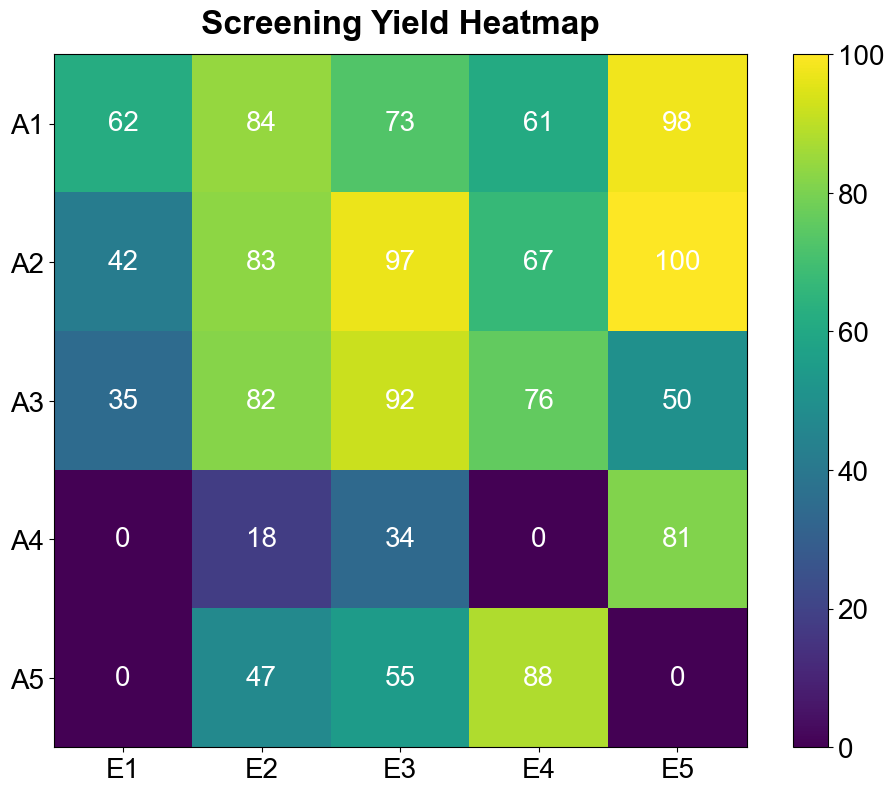

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Data provided by the user in a tabular format (extracted from the image)
data = np.array([
    [62, 84, 73, 61, 98],
    [42, 83, 97, 67, 100],
    [35, 82, 92, 76, 50],
    [0, 18, 34, 0, 81],
    [0, 47, 55, 88, 0]
])

# Load your images
x_ticks_images = {
    'E1': plt.imread('E1.png'),
    'E2': plt.imread('E2.png'),
    'E3': plt.imread('E3.png'),
    'E4': plt.imread('E4.png'),
    'E5': plt.imread('E5.png'),
    # Load other images as needed
}

y_ticks_images = {
    'A1': plt.imread('A1.png'),
    'A2': plt.imread('A2.png'),
    'A3': plt.imread('A3.png'),
    'A4': plt.imread('A4.png'),
    'A5': plt.imread('A5.png'),
    # Load other images as needed
}

# Define font sizes relative to the title font size
title_font_size = 24
axis_label_font_size = title_font_size - 2
tick_label_font_size = title_font_size - 4
legend_font_size = title_font_size - 4

# Create a figure and a subplot
fig, ax = plt.subplots(figsize=(12, 9))

# Use a heatmap to represent the data
# The cmap 'coolwarm' is used here as an example, which varies from blue (low) to red (high)
# 'Greens' can also be used for varying shades of green
cax = ax.matshow(data, interpolation='nearest', vmin=0, vmax=100)
cbar = fig.colorbar(cax)

# Set font size for colorbar labels
cbar.ax.tick_params(labelsize=tick_label_font_size)

# Set the axis labels to the images
ax.set_xticklabels([''] + list(x_ticks_images.keys()), fontsize=tick_label_font_size)
ax.set_yticklabels([''] + list(y_ticks_images.keys()), fontsize=tick_label_font_size)

# set x-axis tick labels to the bottom
ax.xaxis.set_ticks_position('bottom')

# Loop over data dimensions and create text annotations.
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        ax.text(j, i, f'{data[i, j]}', ha='center', va='center', color='white', fontsize=tick_label_font_size)

# Set the title
ax.set_title('Screening Yield Heatmap', fontsize=title_font_size, pad=15, weight='bold')

# set font to aerial
plt.rcParams["font.family"] = "Arial"

plt.savefig('Yield heatmap.png', dpi=600)
plt.show()

In [55]:
print([''] + list(y_ticks_images.keys()))

['', 'A1', 'A2', 'A3', 'A4', 'A5']


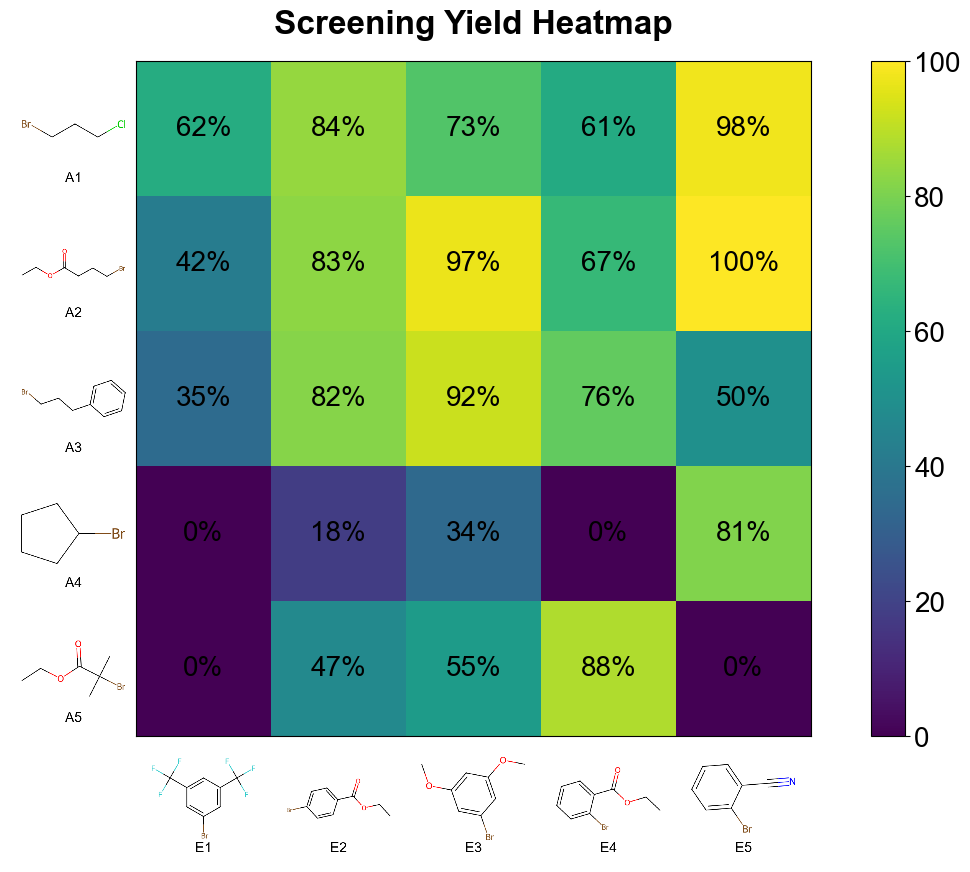

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# 2D matrix of experimental data
data = np.array([
    [62, 84, 73, 61, 98],
    [42, 83, 97, 67, 100],
    [35, 82, 92, 76, 50],
    [0, 18, 34, 0, 81],
    [0, 47, 55, 88, 0]
])

# X axis images
x_ticks_images = {
    'E1': plt.imread('E1.png'),
    'E2': plt.imread('E2.png'),
    'E3': plt.imread('E3.png'),
    'E4': plt.imread('E4.png'),
    'E5': plt.imread('E5.png'),
    # Load other images as needed
}

# Y axis images
y_ticks_images = {
    'A1': plt.imread('A1.png'),
    'A2': plt.imread('A2.png'),
    'A3': plt.imread('A3.png'),
    'A4': plt.imread('A4.png'),
    'A5': plt.imread('A5.png'),
    # Load other images as needed
}

# Define font sizes relative to the title font size
# title font size
title_font_size = 24
# axis label font size
axis_label_font_size = title_font_size - 2
# tick label font size
tick_label_font_size = title_font_size - 4
# legend font size
legend_font_size = title_font_size - 4

# Create a figure and a subplot
fig, ax = plt.subplots(figsize=(12, 9))

# Use a heatmap to represent the data
cax = ax.matshow(data, interpolation='nearest', vmin=0, vmax=100)
cbar = fig.colorbar(cax)
# Set font size for colorbar labels
cbar.ax.tick_params(labelsize=legend_font_size)

# Remove original ticks
ax.set_xticks([])
ax.set_yticks([])
# Place images as x-axis labels at the bottom
for i, label in enumerate(x_ticks_images.keys()):
    img = x_ticks_images[label]
    # Set the y coordinate to be below the axis (-0.5 or lower)
    xy = (i, -0.5 + len(y_ticks_images))
    imagebox = OffsetImage(img, zoom=0.275)
    ab = AnnotationBbox(imagebox, xy, xycoords='data', frameon=False, box_alignment=(0.5, 1.05))
    ax.add_artist(ab)
# Place images as y-axis labels to the left
for i, label in enumerate(y_ticks_images.keys()):
    img = y_ticks_images[label]
    # Set the x coordinate to be to the left of the axis (-0.5 or lower)
    xy = (-0.5, i)
    imagebox = OffsetImage(img, zoom=0.275)
    ab = AnnotationBbox(imagebox, xy, xycoords='data', frameon=False, box_alignment=(1.05, 0.5))
    ax.add_artist(ab)

# Loop over data dimensions and create text annotations.
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        ax.text(j, i, f'{data[i, j]}%', ha='center', va='center', color='black', fontsize=tick_label_font_size)

# Set the title, pad equal to the size of the images + 20
ax.set_title('Screening Yield Heatmap', fontsize=title_font_size, pad=20, weight='bold')

# expand the figure to fit the images
fig.subplots_adjust(left=0, right=1, bottom=0.15, top=0.9)

# set font to aerial
plt.rcParams["font.family"] = "Arial"

plt.savefig('Yield heatmap.png', dpi=600)
plt.show()

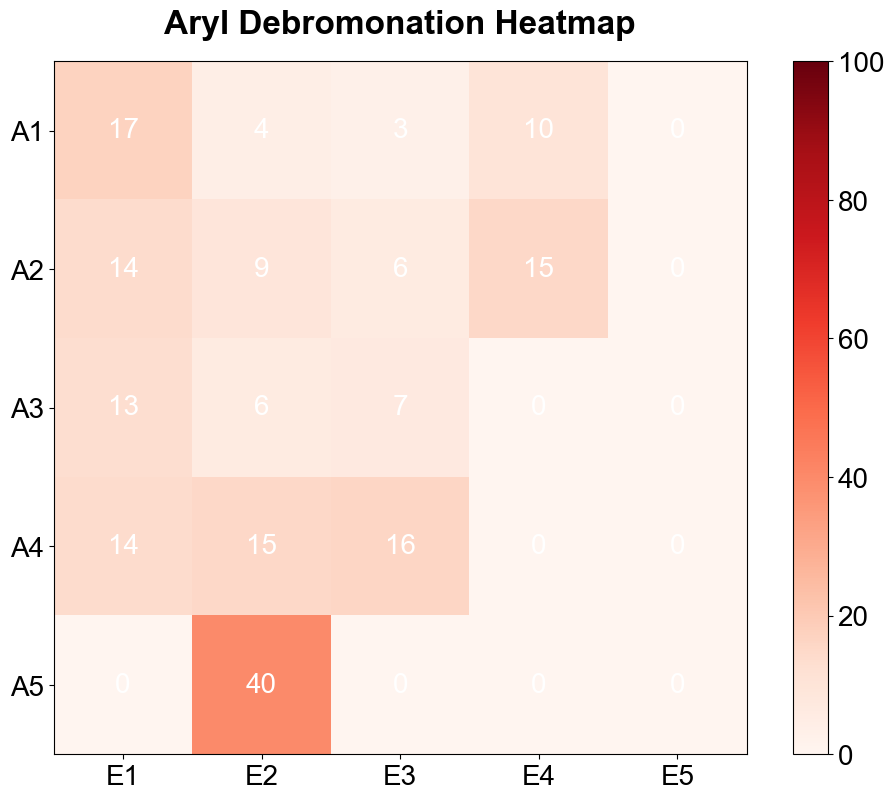

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Data extracted from the image provided by the user
data = np.array([
    [17, 4, 3, 10, 0],
    [14, 9, 6, 15, 0],
    [13, 6, 7, 0, 0],
    [14, 15, 16, 0, 0],
    [0, 40, 0, 0, 0]
])

# Define font sizes relative to the title font size
title_font_size = 24
axis_label_font_size = title_font_size - 2
tick_label_font_size = title_font_size - 4
legend_font_size = title_font_size - 4

# Create a figure and a subplot
fig, ax = plt.subplots(figsize=(12, 9))

# Use a heatmap to represent the data
cax = ax.matshow(data, interpolation='nearest', cmap='Reds', vmin=0, vmax=100)
cbar = fig.colorbar(cax)
cbar.ax.tick_params(labelsize=legend_font_size)  # Set colorbar label font size

# Set the axis labels with the correct font size
ax.set_xticks(np.arange(data.shape[1]))
ax.set_yticks(np.arange(data.shape[0]))
ax.set_xticklabels(['E1', 'E2', 'E3', 'E4', 'E5'], fontsize=tick_label_font_size)
ax.set_yticklabels(['A1', 'A2', 'A3', 'A4', 'A5'], fontsize=tick_label_font_size)
# set x-axis tick labels to the bottom
ax.xaxis.set_ticks_position('bottom')

# Loop over data dimensions and create text annotations with the correct font size.
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        ax.text(j, i, f'{data[i, j]}', ha='center', va='center', color='white', fontsize=tick_label_font_size)

# Set the title with the correct font size
ax.set_title('Aryl Debromonation Heatmap', fontsize=title_font_size, weight='bold', pad=20)

# set font to Arial
plt.rcParams["font.family"] = "Arial"

# Save the figure to a file, high DPI for publication quality
plt.savefig('Aryl Debromonation Heatmap.png', dpi=600)
plt.show()

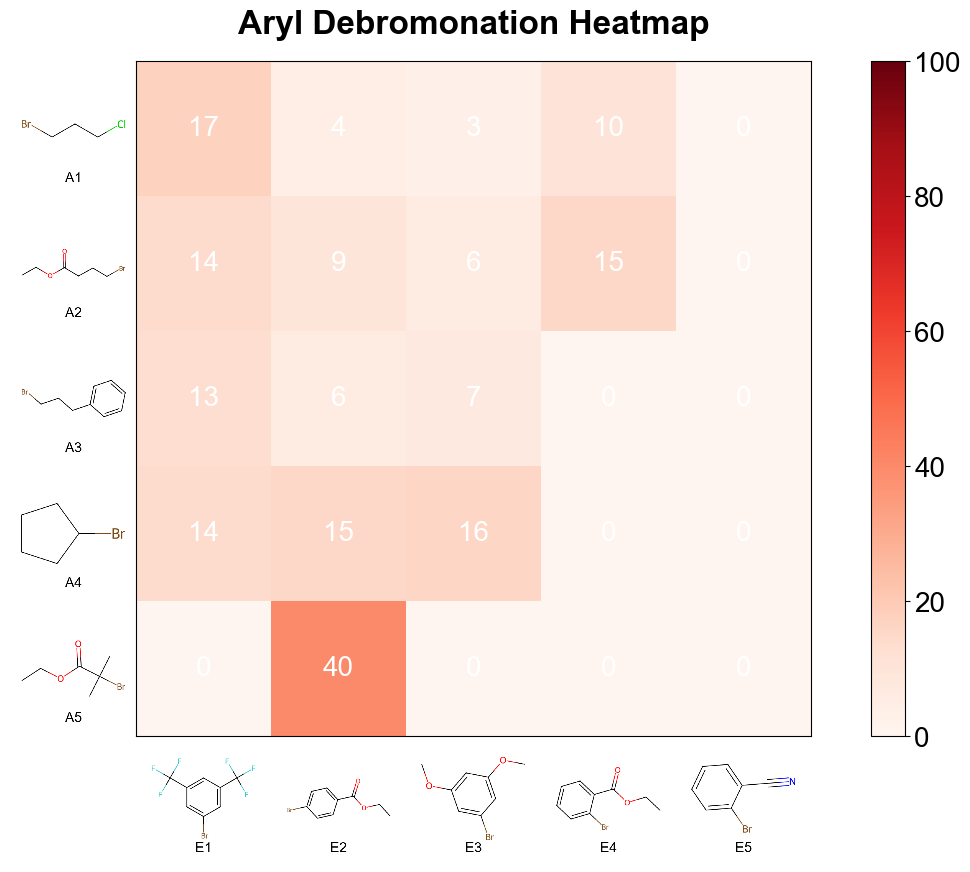

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# 2D matrix of experimental data
data = np.array([
    [17, 4, 3, 10, 0],
    [14, 9, 6, 15, 0],
    [13, 6, 7, 0, 0],
    [14, 15, 16, 0, 0],
    [0, 40, 0, 0, 0]
])

# X axis images
x_ticks_images = {
    'E1': plt.imread('E1.png'),
    'E2': plt.imread('E2.png'),
    'E3': plt.imread('E3.png'),
    'E4': plt.imread('E4.png'),
    'E5': plt.imread('E5.png'),
    # Load other images as needed
}

# Y axis images
y_ticks_images = {
    'A1': plt.imread('A1.png'),
    'A2': plt.imread('A2.png'),
    'A3': plt.imread('A3.png'),
    'A4': plt.imread('A4.png'),
    'A5': plt.imread('A5.png'),
    # Load other images as needed
}

# Define font sizes relative to the title font size
# title font size
title_font_size = 24
# axis label font size
axis_label_font_size = title_font_size - 2
# tick label font size
tick_label_font_size = title_font_size - 4
# legend font size
legend_font_size = title_font_size - 4

# Create a figure and a subplot
fig, ax = plt.subplots(figsize=(12, 9))

# Use a heatmap to represent the data
cax = ax.matshow(data, interpolation='nearest', cmap='Reds', vmin=0, vmax=100)
cbar = fig.colorbar(cax)
cbar.ax.tick_params(labelsize=legend_font_size)  # Set colorbar label font size

# Remove original ticks
ax.set_xticks([])
ax.set_yticks([])
# Place images as x-axis labels at the bottom
for i, label in enumerate(x_ticks_images.keys()):
    img = x_ticks_images[label]
    # Set the y coordinate to be below the axis (-0.5 or lower)
    xy = (i, -0.5 + len(y_ticks_images))
    imagebox = OffsetImage(img, zoom=0.275)
    ab = AnnotationBbox(imagebox, xy, xycoords='data', frameon=False, box_alignment=(0.5, 1.05))
    ax.add_artist(ab)
# Place images as y-axis labels to the left
for i, label in enumerate(y_ticks_images.keys()):
    img = y_ticks_images[label]
    # Set the x coordinate to be to the left of the axis (-0.5 or lower)
    xy = (-0.5, i)
    imagebox = OffsetImage(img, zoom=0.275)
    ab = AnnotationBbox(imagebox, xy, xycoords='data', frameon=False, box_alignment=(1.05, 0.5))
    ax.add_artist(ab)

# Loop over data dimensions and create text annotations with the correct font size.
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        ax.text(j, i, f'{data[i, j]}', ha='center', va='center', color='white', fontsize=tick_label_font_size)

# Set the title with the correct font size
ax.set_title('Aryl Debromonation Heatmap', fontsize=title_font_size, weight='bold', pad=20)

# expand the figure to fit the images
fig.subplots_adjust(left=0, right=1, bottom=0.15, top=0.9)

# set font to Arial
plt.rcParams["font.family"] = "Arial"

# Save the figure to a file, high DPI for publication quality
plt.savefig('Aryl Debromonation Heatmap.png', dpi=600)
plt.show()

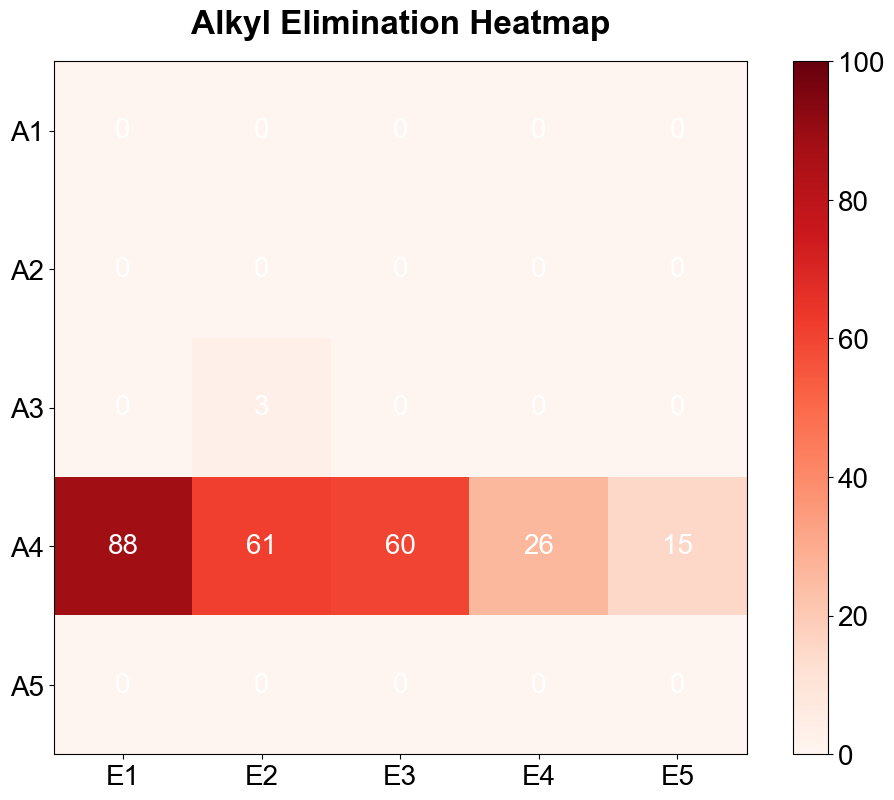

In [59]:
# Data extracted from the image provided by the user
data = np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 3, 0, 0, 0],
    [88, 61, 60, 26, 15],
    [0, 0, 0, 0, 0]
])

# Reusing the previous settings for the new heatmap
fig, ax = plt.subplots(figsize=(12, 9))

# Use a heatmap to represent the data
cax = ax.matshow(data, interpolation='nearest', cmap='Reds', vmin=0, vmax=100)
cbar = fig.colorbar(cax)
cbar.ax.tick_params(labelsize=legend_font_size)  # Set colorbar label font size

# Set the axis labels with the correct font size
ax.set_xticks(np.arange(data.shape[1]))
ax.set_yticks(np.arange(data.shape[0]))
ax.set_xticklabels(['E1', 'E2', 'E3', 'E4', 'E5'], fontsize=tick_label_font_size)
ax.set_yticklabels(['A1', 'A2', 'A3', 'A4', 'A5'], fontsize=tick_label_font_size)
# set x-axis tick labels to the bottom
ax.xaxis.set_ticks_position('bottom')

# Loop over data dimensions and create text annotations with the correct font size.
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        ax.text(j, i, f'{data[i, j]}', ha='center', va='center', color='white', fontsize=tick_label_font_size)

# Set the title with the new specified title
ax.set_title('Alkyl Elimination Heatmap', fontsize=title_font_size, weight='bold', pad=20)

# Set font to Arial
plt.rcParams["font.family"] = "Arial"

# Save the figure to a file with the same DPI as before
plt.savefig('Alkyl Elimination Heatmap.png', dpi=600)
plt.show()

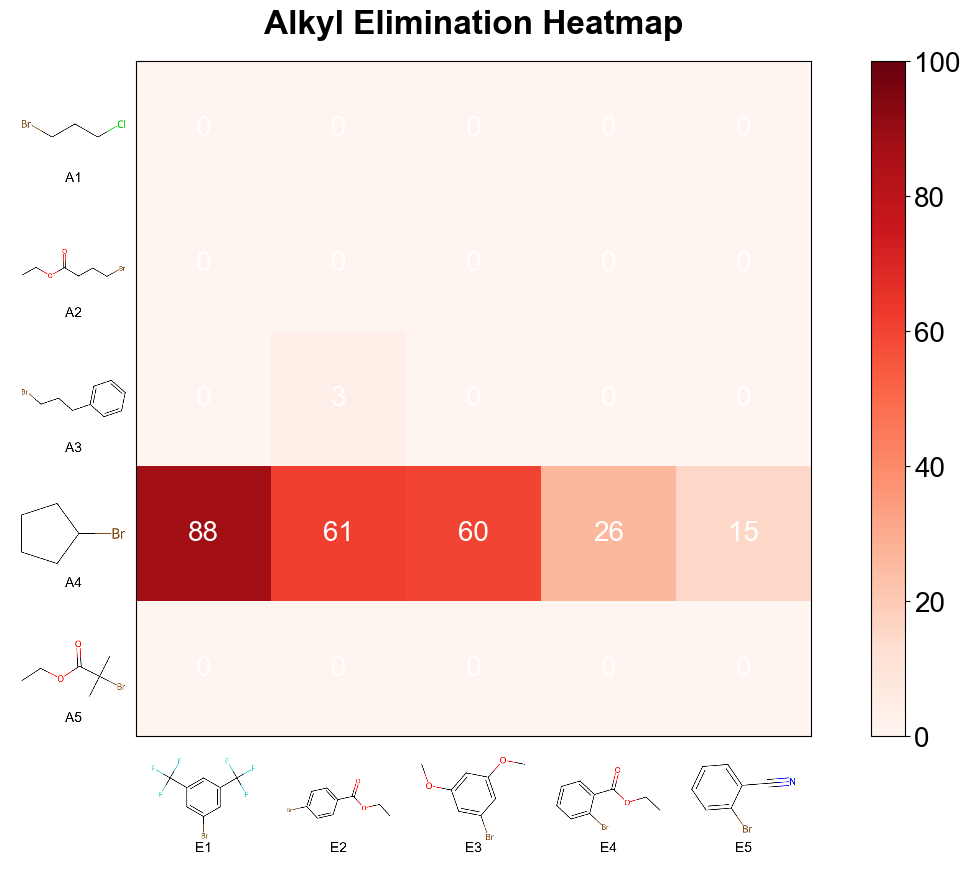

In [60]:
# Data extracted from the image provided by the user
data = np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 3, 0, 0, 0],
    [88, 61, 60, 26, 15],
    [0, 0, 0, 0, 0]
])

# X axis images
x_ticks_images = {
    'E1': plt.imread('E1.png'),
    'E2': plt.imread('E2.png'),
    'E3': plt.imread('E3.png'),
    'E4': plt.imread('E4.png'),
    'E5': plt.imread('E5.png'),
    # Load other images as needed
}

# Y axis images
y_ticks_images = {
    'A1': plt.imread('A1.png'),
    'A2': plt.imread('A2.png'),
    'A3': plt.imread('A3.png'),
    'A4': plt.imread('A4.png'),
    'A5': plt.imread('A5.png'),
    # Load other images as needed
}

# Define font sizes relative to the title font size
# title font size
title_font_size = 24
# axis label font size
axis_label_font_size = title_font_size - 2
# tick label font size
tick_label_font_size = title_font_size - 4
# legend font size
legend_font_size = title_font_size - 4

# Reusing the previous settings for the new heatmap
fig, ax = plt.subplots(figsize=(12, 9))

# Use a heatmap to represent the data
cax = ax.matshow(data, interpolation='nearest', cmap='Reds', vmin=0, vmax=100)
cbar = fig.colorbar(cax)
cbar.ax.tick_params(labelsize=legend_font_size)  # Set colorbar label font size

# Remove original ticks
ax.set_xticks([])
ax.set_yticks([])
# Place images as x-axis labels at the bottom
for i, label in enumerate(x_ticks_images.keys()):
    img = x_ticks_images[label]
    # Set the y coordinate to be below the axis (-0.5 or lower)
    xy = (i, -0.5 + len(y_ticks_images))
    imagebox = OffsetImage(img, zoom=0.275)
    ab = AnnotationBbox(imagebox, xy, xycoords='data', frameon=False, box_alignment=(0.5, 1.05))
    ax.add_artist(ab)
# Place images as y-axis labels to the left
for i, label in enumerate(y_ticks_images.keys()):
    img = y_ticks_images[label]
    # Set the x coordinate to be to the left of the axis (-0.5 or lower)
    xy = (-0.5, i)
    imagebox = OffsetImage(img, zoom=0.275)
    ab = AnnotationBbox(imagebox, xy, xycoords='data', frameon=False, box_alignment=(1.05, 0.5))
    ax.add_artist(ab)

# Loop over data dimensions and create text annotations with the correct font size.
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        ax.text(j, i, f'{data[i, j]}', ha='center', va='center', color='white', fontsize=tick_label_font_size)

# Set the title with the new specified title
ax.set_title('Alkyl Elimination Heatmap', fontsize=title_font_size, weight='bold', pad=20)

# expand the figure to fit the images
fig.subplots_adjust(left=0, right=1, bottom=0.15, top=0.9)

# Set font to Arial
plt.rcParams["font.family"] = "Arial"

# Save the figure to a file with the same DPI as before
plt.savefig('Alkyl Elimination Heatmap.png', dpi=600)
plt.show()